In [22]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame()

In [8]:
x1 = np.random.randint(0, 2, size=(1000,))

In [9]:
df['x1'] = x1

In [16]:
x2 = np.random.randint(13, 107, size=(1000),)

In [17]:
df['x2'] = x2

In [18]:
x3 = np.random.exponential?

In [19]:
x3 = np.random.exponential(4, size=(1000),)

In [20]:
df['x3'] = x3

In [24]:
x4 = np.random.multivariate_normal?

In [25]:
x4 = np.random.normal?

In [26]:
x4 = np.random.normal(loc=-300.0, scale=250.0, size=(1000),)

In [27]:
df['x4'] = x4

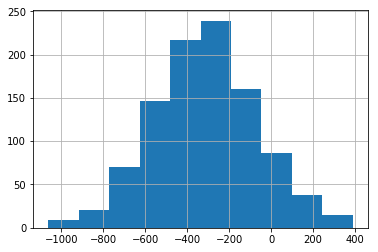

In [28]:
df.x4.hist()

In [39]:
x5_beta = np.random.normal(np.mean(df.x4), scale=np.abs(np.mean(df.x4)), size=(1000),)
x5 = (1200.0 * df.x3) + (200.7 * df.x4) + x4_beta

In [40]:
df['x5'] = x5 

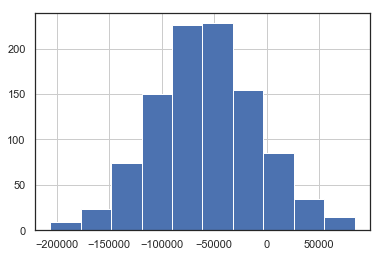

In [41]:
df.x5.hist()

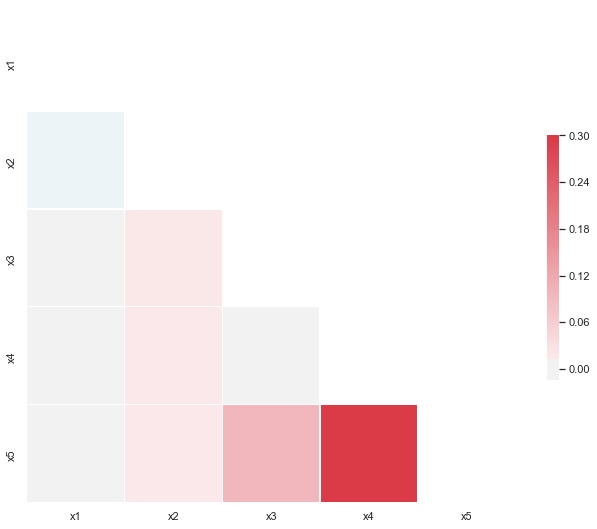

In [42]:
import seaborn as sns

sns.set(style="white")

# Generate a large random dataset
d = df

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Gameplan

1. Exponential regression, overfitting the data
2. Make dataset with numpy
3. Create and run unscaled regression
4. categorical columns not one hot encoded
5. Multi-collinearity between predictors


# Goal

Candidate should:

1. One hot encode categorical data
2. Get regression to run
3. Check fitness of model and make sure they deal with overfitting
4. Scale data (bonus)
5. Identify multicollinearity (bonus)
6. Deal with multicollinearity (bonus)


Target equation:

$$ y = coef1(x1) + coef2(x2)^2 + coef3(x3)^3 + coef4(x4)^3 + coef5(x3)^2 + \beta $$

multicollinearity between coef3, 4, 5. Coef5 should be ~90% explained by coef3 and coef4



In [78]:
coef1 = -0.734
coef2 = 128.624
coef3 = 0.9899
coef4 = 27.125
coef5 = 0.00027
coef6 = 12.76
coef7 = -8.25
coef8 = 0.02



In [79]:
df['target'] = target

In [86]:
choices = ['car', 'bus', 'train']
x6 = np.random.choice(choices, size=(1000),)
df['x6'] = x6

In [95]:
df = pd.get_dummies(df)

In [96]:
df.head()

,x1,x2,x3,x4,x5,target,x6_bus,x6_car,x6_train
0,0,52,3.288021,141.013086,32108.716028,10618.329486,0,0,1
1,1,41,4.413111,-199.960698,-34869.852822,2402.932138,0,1,0
2,1,37,1.351506,-55.315504,-9922.800839,6261.927785,0,1,0
3,0,31,0.078617,260.223300,52042.441959,9204.933455,0,0,1
4,1,80,2.038122,166.889498,35700.150303,14304.047161,0,1,0


In [97]:
target = (coef1 * df.x1) + (coef2 * df.x2) + (coef3 * df.x3) + (coef4 * df.x4) + (coef5 * df.x5)  + (coef6 * df.x6_bus)  + (coef7 * df.x6_car)  + (coef8 * df.x6_train)
target_scale = np.random.normal(scale=2500, size=(1000),)
target += np.random.normal(scale=np.abs(target_scale), size=(1000),)

In [98]:
df['target'] = target

In [99]:
import statsmodels.api as sm

In [100]:
ols = sm.OLS(df.target, df.drop('target', axis=1, inplace=False))

In [101]:
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1489.
Date:                Thu, 13 Dec 2018   Prob (F-statistic):               0.00
Time:                        08:36:41   Log-Likelihood:                -9194.3
No. Observations:                1000   AIC:                         1.840e+04
Df Residuals:                     992   BIC:                         1.844e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            62.2910    151.771      0.410      0.682    -235.538     360.120
x2           127.2149      2.740     46.424      0.000     121.837     132.592
x3           102.9209    302.495      0.340      0.734    -490.682     696.524
x4            40.7100     50.609      0.804      0.421     -58.602     140.022
x5            -0.0651      0.252     -0.258      0.796      -0.560       0.430
x6_bus        99.1729    261.793      0.379      0.705    -414.558     612.904
x6_car        13.0976    258.265      0.051      0.960    -493.712     519.907
x6_train     158.4486    269.535      0.588      0.557    -370.475     687.372
==============================================================================
Omnibus:                      261.459   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2285.126
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      10.164   Cond. No.                     4.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""